# Final Project - Vehicle Detector

---

# 1. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Folder vehicle ini berisi tentang jenis-jenis kendaraan : **Mobil, Motor, Bus, dan Truk** dengan masing-masing memiliki file sebanyak 50 gambar di dataset train.

Jenis-jenis kendaraan ini akan jadikan beberapa kelas yang mana model akan dibuat dan dilatih untuk bisa membedakan jenis kendaraan berdasarkan bentuknya dengan menggunakan gambar kendaraan sebagai input. Setelah model sudah selesai, user akan melakukan uji model yang mana user akan memasukan sebuah gambar kendaraan secara acak. Jika model tersebut bisa memprediksi jenis kendaraan pada gambar yang telah diinput oleh user dan hasilnya tepat, maka model tersebut sudah dikatakan berhasil memprediksi jenis kendaraan dengan baik. 

Contoh : User memberikan inputan (upload) gambar mobil, model akan mengeluarkan output berupa sebuah teks (string) yaitu mobil.

Setelah dibuat model deep learning, kami akan mendeteksi jenis-jenis model melalui video dengan bantuan **OpenCV**.

Link Dataset : https://www.kaggle.com/datasets/rishabkoul1/vechicle-dataset

Objective : 
- Mampu membuat model Deep Learning untuk mengklasifikasi jenis kendaraan berdasarkan bentuk kendaraan (ukuran, jumlah roda, dll) dengan menggunakan gambar sebagai input.
- Model mampu melakukan deteksi kendaraan melalui video/foto dengan bantuan OpenCV.

# 2. Import Pustaka
Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [3]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd


# Tensor flow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Modelling
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16, resnet_v2
from tensorflow.keras.applications.vgg16 import preprocess_input

# Inference
from tensorflow.io import read_file
from tensorflow.image import decode_image, resize
from tensorflow import expand_dims
from sklearn.metrics import classification_report

# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [5]:
# for dirpath, dirnames, filenames in os.walk('vechicle_classification/vechicle_with_train/vechicles'):
#   print(f"Ada {len(dirnames)} folder dan {len(filenames)} gambar di direktori {dirpath}")

for dirpath, dirnames, filenames in os.walk('vehicles'):
  print(f"Ada {len(dirnames)} folder dan {len(filenames)} gambar di direktori {dirpath}")

Ada 3 folder dan 0 gambar di direktori vehicles
Ada 4 folder dan 0 gambar di direktori vehicles\test
Ada 0 folder dan 10 gambar di direktori vehicles\test\bike
Ada 0 folder dan 10 gambar di direktori vehicles\test\bus
Ada 0 folder dan 10 gambar di direktori vehicles\test\car
Ada 0 folder dan 10 gambar di direktori vehicles\test\truck
Ada 4 folder dan 0 gambar di direktori vehicles\train
Ada 0 folder dan 45 gambar di direktori vehicles\train\bike
Ada 0 folder dan 45 gambar di direktori vehicles\train\bus
Ada 0 folder dan 45 gambar di direktori vehicles\train\car
Ada 0 folder dan 45 gambar di direktori vehicles\train\truck
Ada 4 folder dan 0 gambar di direktori vehicles\valid
Ada 0 folder dan 10 gambar di direktori vehicles\valid\bike
Ada 0 folder dan 7 gambar di direktori vehicles\valid\bus
Ada 0 folder dan 9 gambar di direktori vehicles\valid\car
Ada 0 folder dan 5 gambar di direktori vehicles\valid\truck


# 4. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [6]:
# EDA
data_dir = pathlib.Path("vehicles/train")
vechicle = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(vechicle)

['bike' 'bus' 'car' 'truck']


Terdapat 4 jenis kendaraan di dalam folder vechicle ini.

## 4.1. Bike (Motor)

In [7]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  fig = plt.figure(figsize=(15,8))

  # Gambar 1
  ax = fig.add_subplot(1,3,1)
  # ambil gambar secara acak
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"ukuran Gambar 1: {img.shape}")

  # Gambar 2
  ax = fig.add_subplot(1,3,2)
  # ambil gambar secara acak
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"ukuran Gambar 2: {img.shape}")

  # Gambar 3
  ax = fig.add_subplot(1,3,3)
  # ambil gambar secara acak
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"ukuran Gambar 3: {img.shape}")
  return img

ukuran Gambar 1: (100, 100, 3)
ukuran Gambar 2: (100, 100, 3)
ukuran Gambar 3: (100, 100, 3)


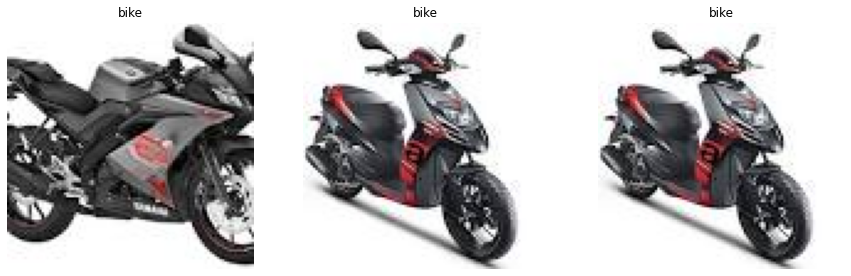

In [8]:
# tampilkan gambar sepeda
bike_img = view_random_image(target_dir='vehicles/train/', target_class='bike')

Ciri-ciri sepeda motor :
- Digerakkan dengan mesin.
- Mempunyai dua roda yang sebaris lurus.
- Mempunyai setang untuk mengendalikan arah jalannya motor.
- Termasuk kendaraan darat

## 4.2. Car (Mobil)

ukuran Gambar 1: (168, 300, 3)
ukuran Gambar 2: (100, 100, 3)
ukuran Gambar 3: (194, 259, 3)


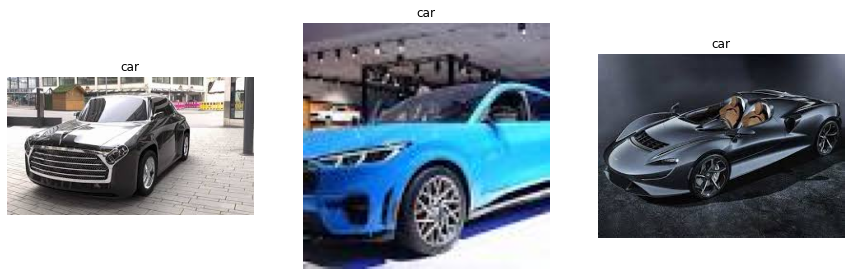

In [9]:
# tampilkan gambar mobil
car_img = view_random_image(target_dir='vehicles/train/', target_class='car')

Ciri-ciri mobil : 
- Kendaraan yang digerakkan dengan mesin.
- Mempunyai dua roda depan dan dua roda belakang.
- Mobil mempunyai ruang dalam yang berisikan kursi.
- Mempunyai setir untuk mengendalikan arah jalannya mobil.
- Mempunyai pintu.
- Termasuk kendaraan darat.

## 4.3. Bus

ukuran Gambar 1: (100, 100, 3)
ukuran Gambar 2: (100, 100, 3)
ukuran Gambar 3: (100, 100, 3)


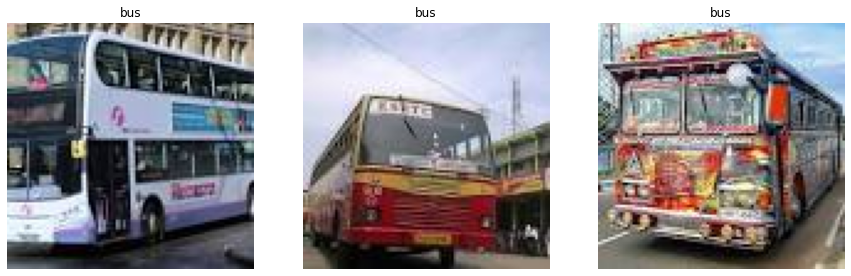

In [10]:
# Bus
bus_img = view_random_image(target_dir='vehicles/train/', target_class='bus')

Ciri-ciri bus :
- Ukuran bus umumnya lebih besar daripada mobil.
- Memiliki dua roda depan dan dua roda belakang.
- Bisa mengangkut banyak penumpang.
- Mempunyai setir untuk mengendalikan arah jalan bus.
- Mempunyai pintu.
- Termasuk kendaran darat.

## 4.4. Truck

ukuran Gambar 1: (540, 900, 3)
ukuran Gambar 2: (540, 900, 3)
ukuran Gambar 3: (100, 100, 3)


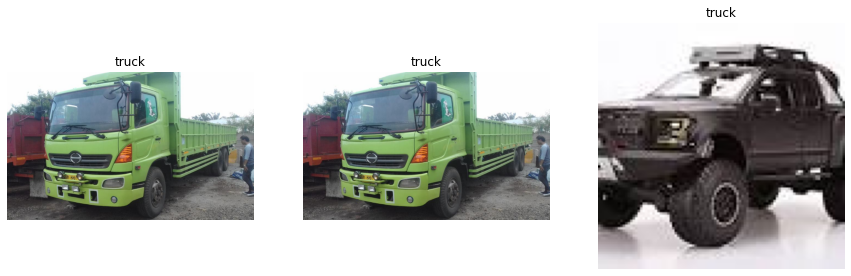

In [11]:
# Truk
truck_img = view_random_image(target_dir='vehicles/train/', target_class='truck')

Ciri-ciri Truk :
- Umumnya memiliki ukuran yang besar dibanding mobil.
- Mempunyai ruang pengankut barang di bagian belakang truk.
- Ruang depan berisikan kursi supir dan penumpang.
- Mempunyai pintu masuk ke dalam ruang depan.
- Termasuk kendaraan darat.

# 5. Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test-inference, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



In [12]:
# preprocessing data image
# Train & Test

tf.random.set_seed(20)

# deklarasikan object
train_datagen = ImageDataGenerator(rescale=1./255)
# augmentasi
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# set direktori
train_dir = 'vehicles/train/'
test_dir = 'vehicles/test/'
val_dir = 'vehicles/valid/'

# set data generator
train_data = train_datagen.flow_from_directory(train_dir,
                                              batch_size=16,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              seed=20)

valid_data = valid_datagen.flow_from_directory(val_dir,
                                              batch_size=16,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              seed=20)

test_data = test_datagen.flow_from_directory(test_dir,
                                              batch_size=16,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              seed=20)                                              

# Augmented
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                              batch_size=16,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              seed=20)

Found 180 images belonging to 4 classes.
Found 31 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 180 images belonging to 4 classes.


# 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## 6.1. Transfer Learning - ResNet

In [21]:
resnet_model = resnet_v2.ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [22]:
resnet_model.trainable = False

In [23]:
from tensorflow.keras.layers import BatchNormalization, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras import Input

global_average_layer = GlobalAveragePooling2D()
layer_1 = Dense(16, activation='selu')
predict_layer = Dense(4)
softmax = Activation("softmax")

inputs = Input(shape=(224,224,3))
x = resnet_model(inputs, training=False)
x = global_average_layer(x)
x = Dropout(0.2)(x)
x = layer_1(x)
outputs = predict_layer(x)
outputs = softmax(outputs)

model4 = Model(inputs, outputs)

In [24]:
model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

# 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 7.1. Model Training dengan Arsitektur ResNet

In [29]:
# ResNet
history4 = model4.fit(train_data_augmented, epochs=20, validation_data=valid_data, verbose=1)

Epoch 1/20
12/12 [==============================] - 25s 2s/step - loss: 1.0174 - accuracy: 0.5944 - val_loss: 0.5090 - val_accuracy: 0.7097
Epoch 2/20
12/12 [==============================] - 19s 2s/step - loss: 0.3187 - accuracy: 0.8944 - val_loss: 0.2148 - val_accuracy: 0.9355
Epoch 3/20
12/12 [==============================] - 19s 2s/step - loss: 0.1386 - accuracy: 0.9444 - val_loss: 0.2648 - val_accuracy: 0.8710
Epoch 4/20
12/12 [==============================] - 22s 2s/step - loss: 0.0849 - accuracy: 0.9833 - val_loss: 0.2378 - val_accuracy: 0.9032
Epoch 5/20
12/12 [==============================] - 15s 1s/step - loss: 0.0821 - accuracy: 0.9722 - val_loss: 0.2421 - val_accuracy: 0.9355
Epoch 6/20
12/12 [==============================] - 17s 1s/step - loss: 0.0653 - accuracy: 0.9778 - val_loss: 0.2622 - val_accuracy: 0.8710
Epoch 7/20
12/12 [==============================] - 21s 2s/step - loss: 0.0587 - accuracy: 0.9667 - val_loss: 0.2376 - val_accuracy: 0.9355
Epoch 8/20
12/12 [==

# 8. Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.



In [32]:
test_data_ = test_data.next()

## 8.3. ResNet Model

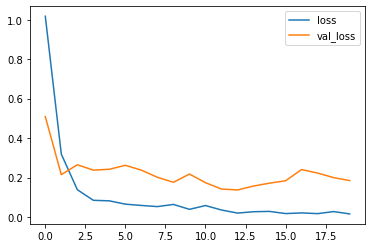

In [40]:
# relu
metrics4 = pd.DataFrame(history4.history)
metrics4[['loss', 'val_loss']].plot();

Model masih terlihat overfitting, tetapi tidak separah dengan base model.

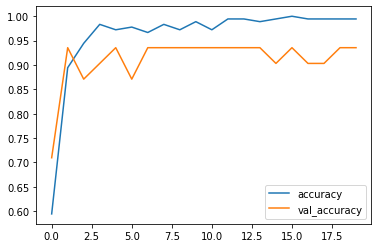

In [41]:
metrics4[['accuracy', 'val_accuracy']].plot();

In [42]:
res4 = model4.predict(test_data_[0])
y_test4 = np.array(test_data_[1]).argmax(axis=1)
res4 = res4.argmax(axis=1)
print(classification_report(y_test4, res4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.83      0.83      0.83         6
           2       1.00      1.00      1.00         3
           3       0.75      0.75      0.75         4

    accuracy                           0.88        16
   macro avg       0.90      0.90      0.90        16
weighted avg       0.88      0.88      0.88        16



Setelah dilakukan evaluasi model, **Model ResNet** adalah model terbaik untuk dijadikan sebagai model prediksi klasifikasi jenis kendaraan karena menurut kami model ini memiliki nilai akurasi yang besar, yaitu 88%.

In [55]:
# Simpan model tensorflow
# model4.save('model_vehicle_v5.h5')
# print('Model saved!')

# model2.save('model_image_vehicle_vgg16.h5')
# print('Model saved!')

Model saved!


# 9. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

## 9.1. Upload Image

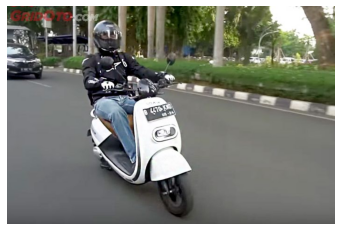

In [50]:
# Tampilkan gambar yang telah di upload

new_img = mpimg.imread('image_inference/motor1.jpg')
plt.imshow(new_img);
plt.axis(False);

In [51]:
def load_and_preprocess(filename, img_shape=224):
  img = read_file(filename)
  img = decode_image(img, channels=3)
  img = resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

## 9.2. Prediksi

In [52]:
new_img = load_and_preprocess('image_inference/motor1.jpg')
new_img = expand_dims(new_img, axis=0)
res = model4.predict(new_img)
res

array([[9.9912328e-01, 8.8985080e-06, 8.4944826e-04, 1.8328983e-05]],
      dtype=float32)

In [53]:
# top=sorted(range(len(res[0])), key=lambda i: res[0][i])[-1:]
# print(top)

vehicle_type=sorted(range(len(res[0])), key=lambda i: res[0][i])
print(vehicle_type)

[1, 3, 2, 0]


In [54]:
# print(str(vechicle[top]))

for i in vehicle_type:
    print(i)
    print(str(vechicle[i])+": %"+str(res[0][i]*100)+"\n")

1
bus: %0.0008898507985577453

3
truck: %0.0018328983060200699

2
car: %0.08494482608512044

0
bike: %99.91232752799988



Data Inference yang digunakan adalah gambar kendaraan berjenis motor. Setelah diprediksi dengan menggunakan model ResNet, hasil yang didapat adalah 99% gambar tersebut menjelaskan bahwa gambar ini termasuk jenis kendaraan motor (Bike). Hasilnya sesuai ekspetasi karena model ini bisa memprediksi klasifikasi jenis kendaraan dengan tepat.

# 10. Kesimpulan

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Berdasarkan EDA : 
  - Terdapat 4 jenis kendaraan yang ada di dalam folder vehicle ini : mobil, motor, bus, dan truk.
  - Bus merupakan salah satu kendaraan yang dapat menompang banyak penumpang. Ukuran bus tersebut umumnya besar dari mobil.
  - Motor adalah kendaraan yang lebih ringan daripada kendaraan yang lain. Terdiri dari 2 orang (pengendara dan penumpang) dan memiliki dua roda yang sebaris.
  - Truk biasanya digunakan untuk membawa barang-barang yang memiliki bobot yang besar.
2. Berdasarkan Evaluasi Model :
  - Setelah model dibuat dan dilatih (train) dengan beberapa metode algoritma yang berbeda, didapatkan **Model dengan menggunakan Arsitektur ResNet** adalah model deep learning terbaik untuk mengklasifikasi jenis kendaraan karena nilai loss yang didapatkan lebih rendah daripada base model dan akurasi yang didapatkan lebih tinggi daripada base model. Sehingga ketika model mengklasifikasi jenis kendaraan dengan gambar kendaraan sebagai input dapat diprediksi dengan baik.
  - Model ini akan dijadikan sebagai alat untuk membuat openCV untuk mendeteksi dan menghitung jenis kendaraan di suatu video.